In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

2016-08-23 00:00:00


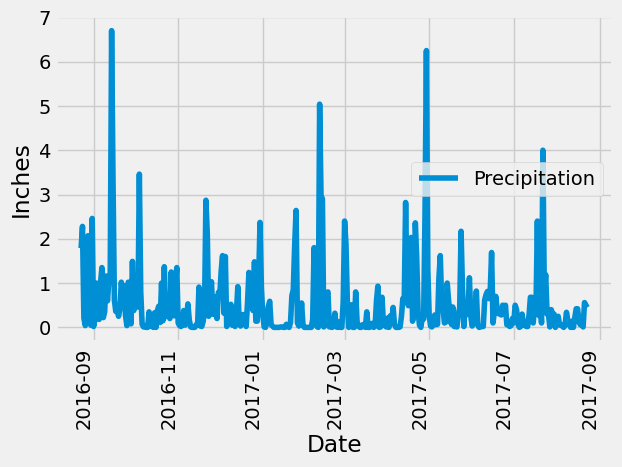

<Figure size 640x480 with 0 Axes>

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
recent_date = dt.datetime.strptime(recent_date[0], "%Y-%m-%d")
recent_date

# Calculate the date one year from the last date in data set.
first_date = recent_date - dt.timedelta(days=365)
print(first_date)

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date, Measurement.prcp).\
                        filter(Station.station==Measurement.station).\
                        filter(Measurement.date >= '2016-08-23').all()
prcp_scores

# # Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_scores_df = pd.DataFrame(prcp_scores, columns=["Date", "Precipitation"])
prcp_scores_df

# # Sort the dataframe by date
prcp_scores_df = prcp_scores_df.sort_values(by=["Date"], ascending = True)
prcp_scores_df["Date"] = pd.to_datetime(prcp_scores_df["Date"])
prcp_scores_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_group_date_df = prcp_scores_df.groupby(["Date"])["Precipitation"].max()
prcp_group_date_df

prcp_group_date_df.plot(x_compat= True, rot=90)
plt.yticks(np.arange(0, 8, 1.0))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend()
plt.show()
plt.tight_layout()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_scores_df[["Precipitation"]].describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
numb_station = session.query(func.count(Station.station)).distinct().all()
numb_station

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_act_station = session.query(Station.station, func.count(Station.id)).filter(Station.station==Measurement.station).\
            group_by(Station.station).\
            order_by(func.count(Station.id).desc()).all()
most_act_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_hi_avg_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                                filter(Station.station==Measurement.station).\
                                filter(Station.station == "USC00519281").all()
low_hi_avg_temp

[(54.0, 85.0, 71.66378066378067)]

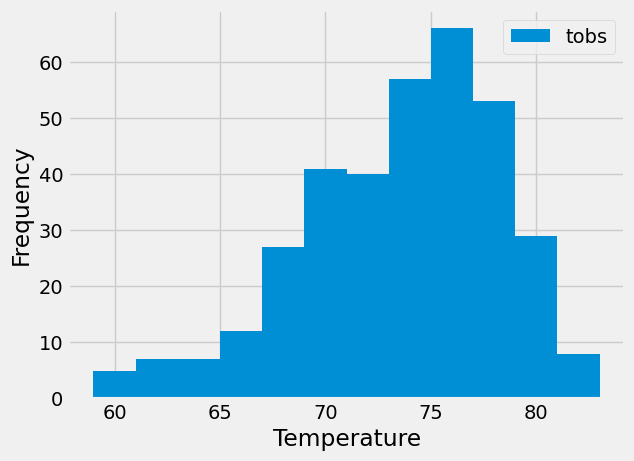

<Figure size 640x480 with 0 Axes>

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_stat = session.query(Measurement.tobs).\
            filter(Station.station==Measurement.station).\
            filter(Measurement.date >= '2016-08-23').\
            filter(Station.station == "USC00519281").all()

temp_stat_df = pd.DataFrame(temp_stat)

temp_stat_df.plot(kind = "hist", bins = 12)
plt.xlabel("Temperature")
plt.legend()
plt.show()
plt.tight_layout()

# Close Session

In [16]:
# Close Session
session.close()